In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

In [2]:
# %load import_set.py
# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import os
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn에 있는 모델들
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# 2.4 분류 예측의 불확실성 추정

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

# 예제를 위해 클래스 이름을 'blue'와 'red'로 바꿉니다.
y_named = np.array(['blue', 'red'])[y]

# 여러 개의 배열을 한꺼번에 train_test_split에 넣을 수 있습니다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state = 0)

# 그래디언트 부스팅 모델을 만듭니다.
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## 2.4.1 결정 함수

In [4]:
print("X_test.shape :", X_test.shape)
print("결정 함수 결과 형태", gbrt.decision_function(X_test).shape)

X_test.shape : (25, 2)
결정 함수 결과 형태 (25,)


데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도  
-> 양수 값은 양성 클래스를 의미하며 음수 값은 음성 클래스를 의미합니다.

In [5]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 :\n", gbrt.decision_function(X_test)[:6])

결정 함수 :
 [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [6]:
print("임계치와 결정 함수 결과 비교 :\n", gbrt.decision_function(X_test) > 0)
print("예측 :\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교 :
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측 :
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


음성 클래스는 항상 classes_ 속성의 첫 번째 원소  
양성 클래스는 항상 classes_ 속성의 두 번째 원소

In [7]:
# 불리언 값을 0과 1로 변환합니다.
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# classes_에 인덱스로 사용합니다.
pred = gbrt.classes_[greater_zero]

# pred와 gbrt.predict의 결과를 비교합니다.
print("pred는 예측 결과와 같다 :", np.all(pred == gbrt.predict(X_test)))

pred는 예측 결과와 같다 : True


decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라집니다.

In [8]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값 : {:.2f} 최댓값 : {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값 : -7.69 최댓값 : 4.29


2차원 평면에서 모든 점에 대해 decision_function 값을 색으로 표현하여 결정 경계와 함께 그래프로 나타내겠습니다.  
훈련 데이터는 원 모양, 테스트 데이터는 삼각형

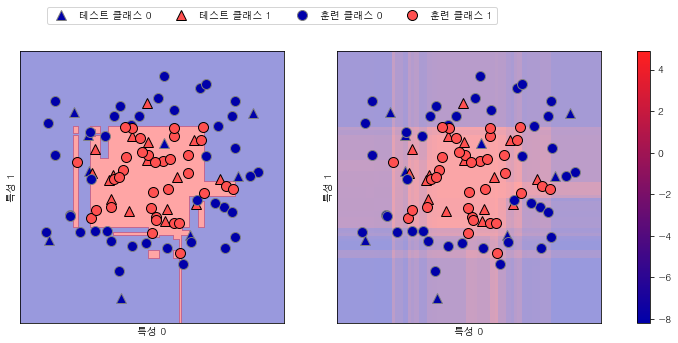

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = .4, cm = mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax = axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol = 4, loc = (.1, 1.1));

## 2.4.2 예측 확률

predict_proba의 출력은 각 클래스에 대한 확률이고 이 값의 크기는 이진 분류에서는 항상 (n_samples, 2)입니다.

In [10]:
print("확률 값의 형태 :", gbrt.predict_proba(X_test).shape)

확률 값의 형태 : (25, 2)


In [11]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 확률 :\n", gbrt.predict_proba(X_test[:6]))

예측 확률 :
 [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


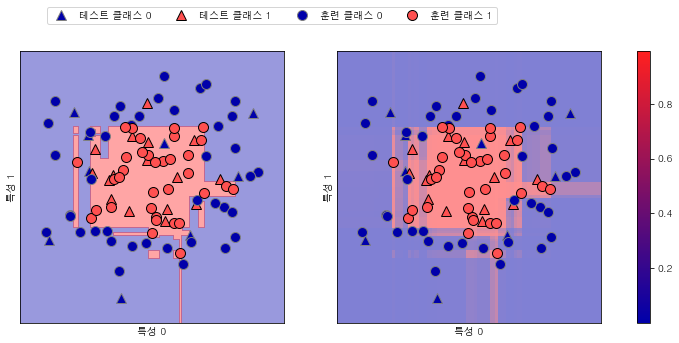

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = .5, cm = mglearn.ReBl, function = 'predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
# colorbar를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax = axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol = 4, loc = (.1, 1.1));

## 2.4.3 다중 분류에서의 불확실성

decision_funcrion과 predict_proba 메서드는 다중 분류에도 사용할 수 있습니다.

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [14]:
print("결정 계수의 결과 형태 :", gbrt.decision_function(X_test).shape)

# decision_function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과 :\n", gbrt.decision_function(X_test)[:6, :])

결정 계수의 결과 형태 : (38, 3)
결정 함수 결과 :
 [[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


다중 분류에서는 decision_function의 결과값의 크기는 (n_samples, n_classes)입니다.

In [15]:
print("가장 큰 결정 함수의 인덱스 :\n", np.argmax(gbrt.decision_function(X_test), axis = 1))
print("예측 :\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [16]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 확률 :\n", gbrt.predict_proba(X_test[:6]))

# 행 방향으로 확률을 더하면 1이 됩니다.
print("합 :", gbrt.predict_proba(X_test)[:6].sum(axis = 1))

예측 확률 :
 [[0.107 0.784 0.109]
 [0.789 0.106 0.105]
 [0.102 0.108 0.789]
 [0.107 0.784 0.109]
 [0.108 0.663 0.228]
 [0.789 0.106 0.105]]
합 : [1. 1. 1. 1. 1. 1.]


In [17]:
print("가장 큰 예측 확률의 인덱스 :\n", np.argmax(gbrt.predict_proba(X_test), axis = 1))
print("예측 :\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [18]:
logreg = LogisticRegression()

# iris dataset의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류 :", logreg.classes_)
print("예측 :", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis = 1)
print("가장 큰 결정 함수의 인덱스 :", argmax_dec_func[:10])
print("인덱스를 calsses_에 연결 :", logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류 : ['setosa' 'versicolor' 'virginica']
예측 : ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스 : [1 0 2 1 1 0 1 2 1 1]
인덱스를 calsses_에 연결 : ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
